In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Final EDA

## Load Datasets

In [141]:
#read csv files
df_ba = pd.read_csv('sales_data.csv')
df_lz = pd.read_csv('laz_data.csv').rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'}).set_index('index')
df_sp = pd.read_csv('shopee_data.csv').rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'}).set_index('index')
df_sp = df_sp.drop(columns=['Unnamed: 0.1', 'month'])
df_fb = pd.read_csv('fb_data.csv').rename(columns={'Unnamed: 0': 'index', 'platform.1':'platform_1'}).set_index('index')

In [142]:
#parse dates
df_ba['date'] = pd.to_datetime(df_ba['date'], format='%Y-%m-%d')
df_lz['date'] = pd.to_datetime(df_lz['date'], format='%Y-%m-%d')
df_sp['date'] = pd.to_datetime(df_sp['date'], format='%Y-%m-%d')
df_fb['date'] = pd.to_datetime(df_fb['date'], format='%Y-%m-%d')

In [143]:
#remove multibrands
df_lz = df_lz[df_lz.brand_name.isin(['Enfagrow', 'Lactum', 'Sustagen Premium'])]

In [146]:
df_ba['brand'] = df_ba.brand.replace({'Enfagrow': 'Enfa', 'Enfamama': 'Enfa', 
                         'Enfamil': 'Enfa', 'Sustagen Premium': 'Sustagen'})
df_lz['brand_name'] = df_lz.brand_name.replace({'Enfagrow': 'Enfa', 'Sustagen Premium': 'Sustagen'})
df_sp['brand'] = df_sp.brand.replace({'Enfagrow': 'Enfa', 'Sustagen Premium': 'Sustagen'})

## Sales

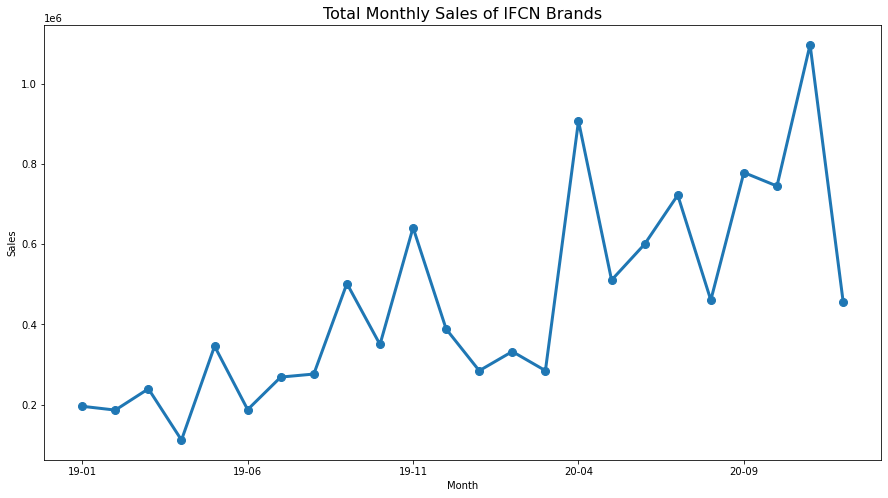

In [151]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['sales'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Total Monthly Sales of IFCN Brands', fontsize=16);

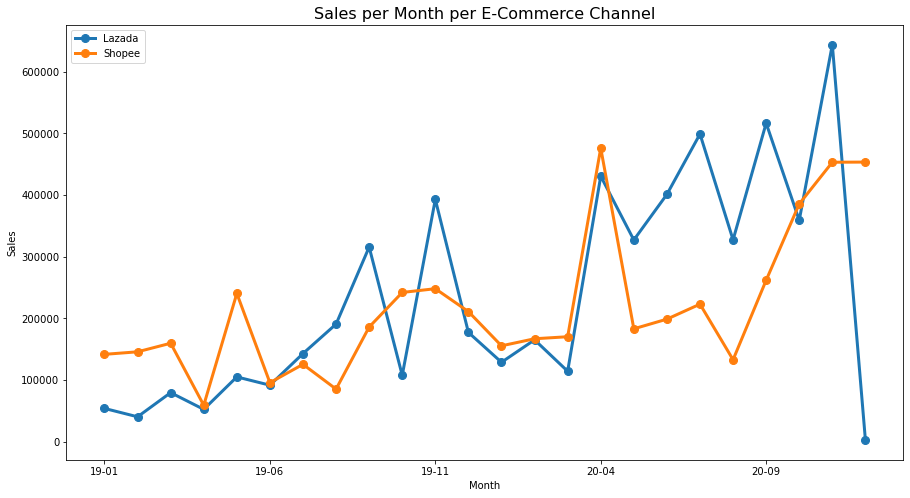

In [152]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Sales per Month per E-Commerce Channel', fontsize=16);

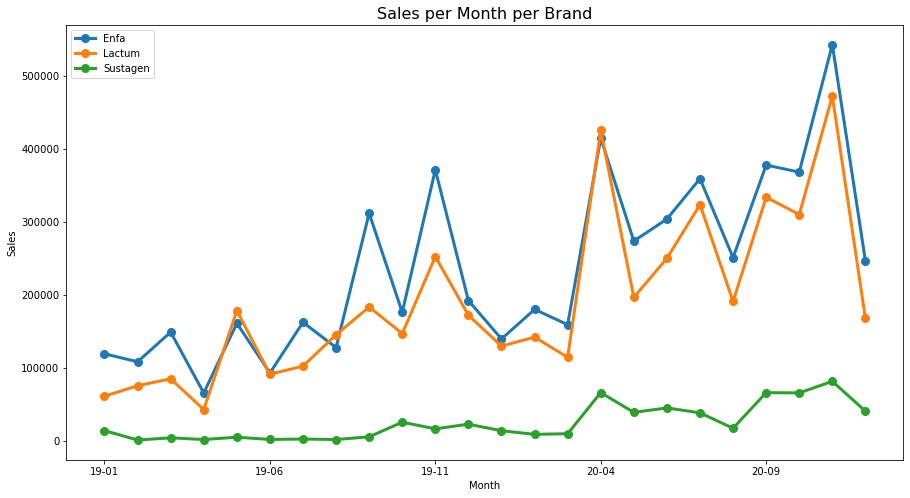

In [153]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='sales', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Sales per Month per Brand', fontsize=16);

## Product Views

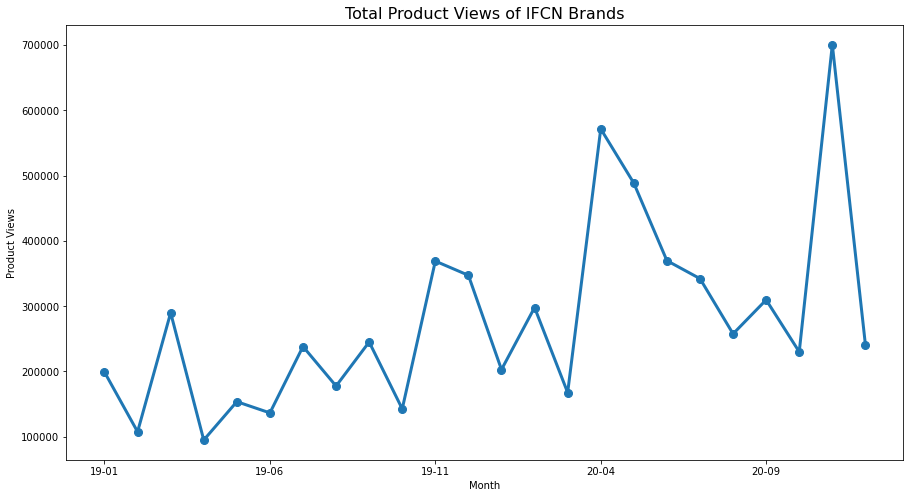

In [154]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['product_views'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title('Total Product Views of IFCN Brands', fontsize=16);

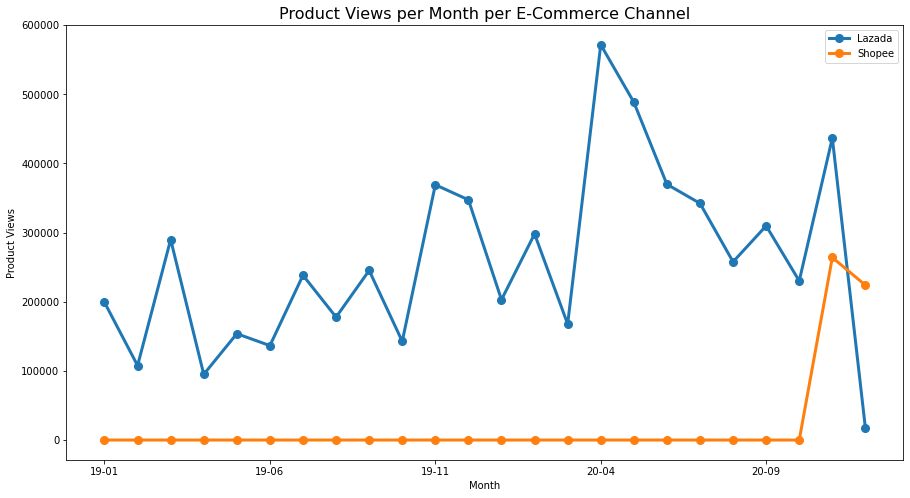

In [155]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='product_views', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['channel'], aggfunc=np.sum)

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title('Product Views per Month per E-Commerce Channel', fontsize=16);

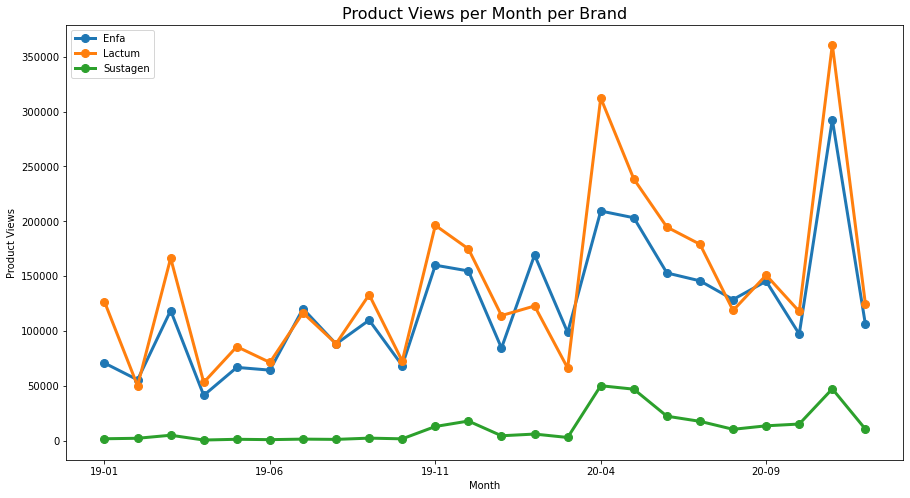

In [156]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_ba, values='product_views', 
                   index=df_ba['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Product Views')
ax.set_xlabel('Month')
ax.set_title('Product Views per Month per Brand', fontsize=16);

In [157]:
d

brand    Enfa  Lactum  Sustagen
date                           
19-01   70754  126610      1760
19-02   55473   49985      2195
19-03  118602  166371      4967
19-04   41298   53100       597
19-05   66799   85698      1277
19-06   64299   71326       947
19-07  120306  116537      1429
19-08   88156   88398      1179
19-09  109860  133024      2329
19-10   68476   72539      1697
19-11  159934  196257     12935
19-12  154685  174800     17907
20-01   84426  114015      4479
20-02  169211  122773      6040
20-03   98610   66177      2930
20-04  209294  312343     50092
20-05  203160  238479     46939
20-06  152857  194665     22314
20-07  145664  178995     17628
20-08  128640  118691     10366
20-09  145339  150854     13552
20-10   97177  117750     15175
20-11  292603  360889     47221
20-12  105995  124530     10551

In [158]:
d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d1

date
19-01     54119.58
19-02     11172.81
19-03     61202.13
19-04     12285.60
19-05     35374.64
19-06     34639.96
19-07     71564.81
19-08     57106.64
19-09     55568.64
19-10     33824.84
19-11    169933.83
19-12    152029.69
20-01     43831.06
20-02     80460.00
20-03     13403.25
20-04     86961.06
20-05     68893.86
20-06    103917.09
20-07     59629.50
20-08      4425.55
20-09      3819.75
20-10     65346.58
20-11     99812.39
20-12     99944.54
Name: revenue_usd, dtype: float64

In [159]:
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d2

date
20-01    18834.58
20-02    27804.58
20-03    20551.01
20-04    76576.08
20-05    13575.58
20-06    27866.53
20-07    17409.23
20-08      764.01
20-09     3081.43
20-10    57883.69
20-11    59325.99
20-12    46646.35
Name: gmv_usd, dtype: float64

In [160]:
d1.to_frame().join(d2, on='date')

revenue_usd   gmv_usd
date                        
19-01     54119.58       NaN
19-02     11172.81       NaN
19-03     61202.13       NaN
19-04     12285.60       NaN
19-05     35374.64       NaN
19-06     34639.96       NaN
19-07     71564.81       NaN
19-08     57106.64       NaN
19-09     55568.64       NaN
19-10     33824.84       NaN
19-11    169933.83       NaN
19-12    152029.69       NaN
20-01     43831.06  18834.58
20-02     80460.00  27804.58
20-03     13403.25  20551.01
20-04     86961.06  76576.08
20-05     68893.86  13575.58
20-06    103917.09  27866.53
20-07     59629.50  17409.23
20-08      4425.55    764.01
20-09      3819.75   3081.43
20-10     65346.58  57883.69
20-11     99812.39  59325.99
20-12     99944.54  46646.35

## Campaigns

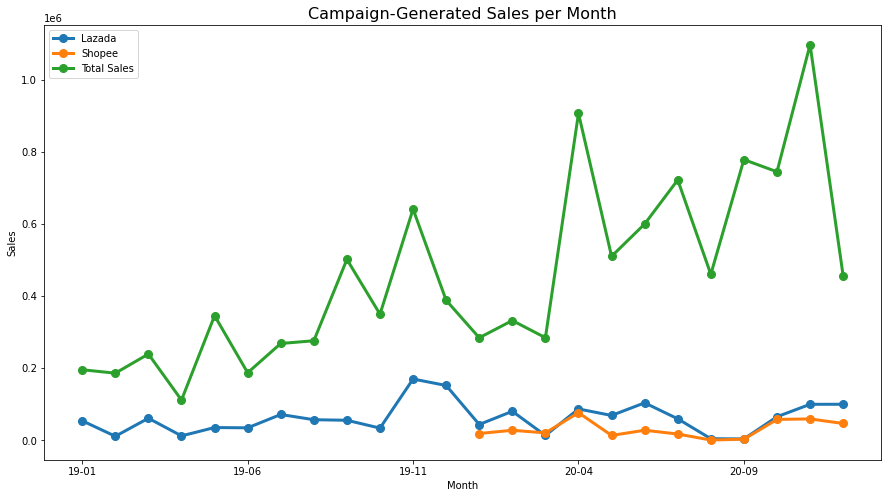

In [161]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_lz.groupby(df_lz['date'].dt.strftime("%y-%m"))['revenue_usd'].sum()
d2 = df_sp.groupby(df_sp['date'].dt.strftime("%y-%m"))['gmv_usd'].sum()
d3 = df_ba.groupby(df_ba['date'].dt.strftime("%y-%m"))['sales'].sum()
d = d1.to_frame().join(d2, on='date').join(d3, on='date')
d = d.rename(columns={'revenue_usd':'Lazada', 'gmv_usd':'Shopee', 'sales':'Total Sales'})

d['Lazada'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Lazada')
d['Shopee'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Shopee')
d['Total Sales'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Total Sales')
# ax.get_legend().remove()
# ax.get_xaxis().set_visible(False)
ax.legend()
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Campaign-Generated Sales per Month', fontsize=16);

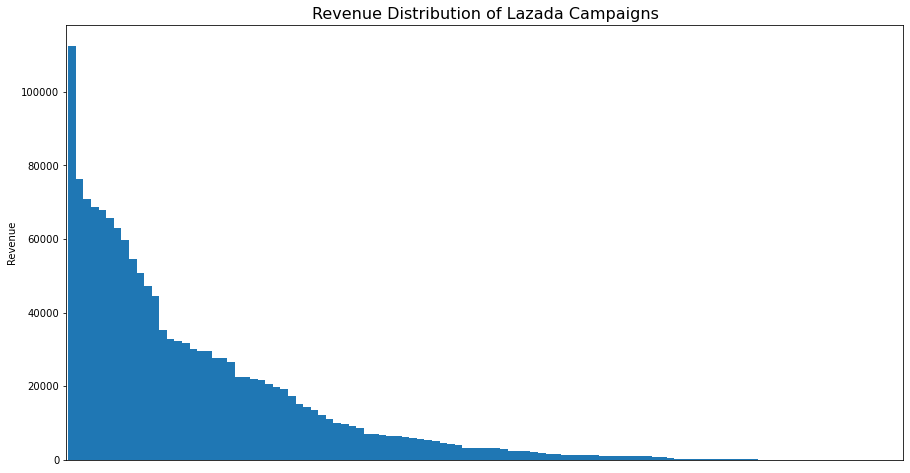

In [162]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_lz.groupby('campaign_id').revenue_usd.sum().sort_values(ascending=False)
d = d.reset_index().drop(columns='campaign_id')
d.plot(kind="bar", color='tab:blue', width=1, ax=ax)
ax.get_legend().remove()
ax.get_xaxis().set_visible(False)
ax.set_ylabel('Revenue')
ax.set_title('Revenue Distribution of Lazada Campaigns', fontsize=16);

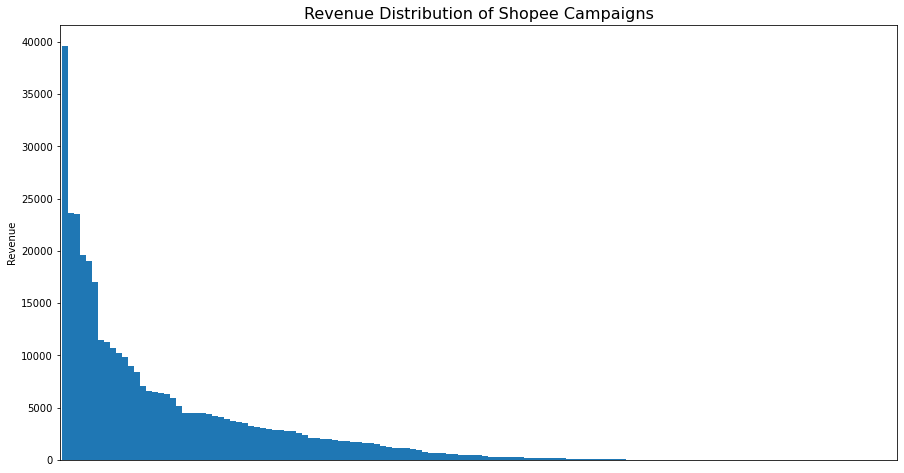

In [163]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_sp.groupby('campaign').gmv_usd.sum().sort_values(ascending=False)
d = d.reset_index().drop(columns='campaign')
d.plot(kind="bar", color='tab:blue', width=1, ax=ax)
ax.get_legend().remove()
ax.get_xaxis().set_visible(False)
ax.set_ylabel('Revenue')
ax.set_title('Revenue Distribution of Shopee Campaigns', fontsize=16);

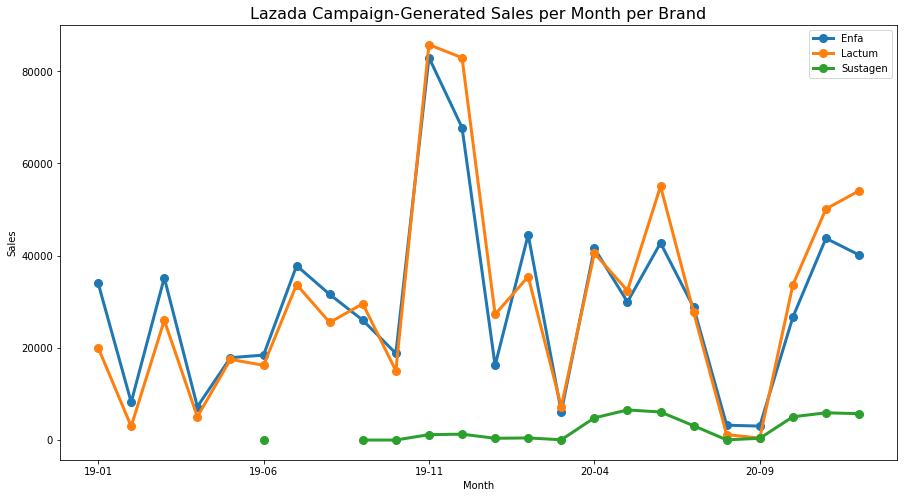

In [168]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_lz, values='revenue_usd', 
                   index=df_lz['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Lazada Campaign-Generated Sales per Month per Brand', fontsize=16);

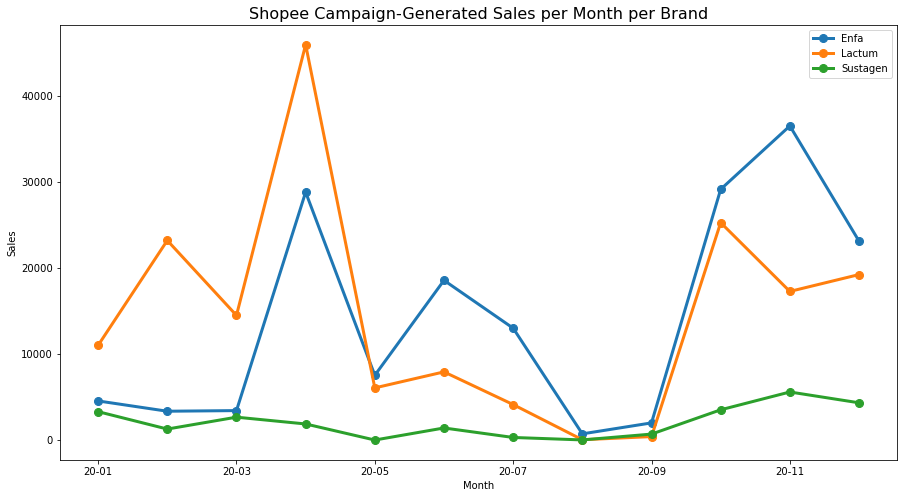

In [172]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_sp, values='gmv_usd', 
                   index=df_sp['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Sales')
ax.set_xlabel('Month')
ax.set_title('Shopee Campaign-Generated Sales per Month per Brand', fontsize=16);

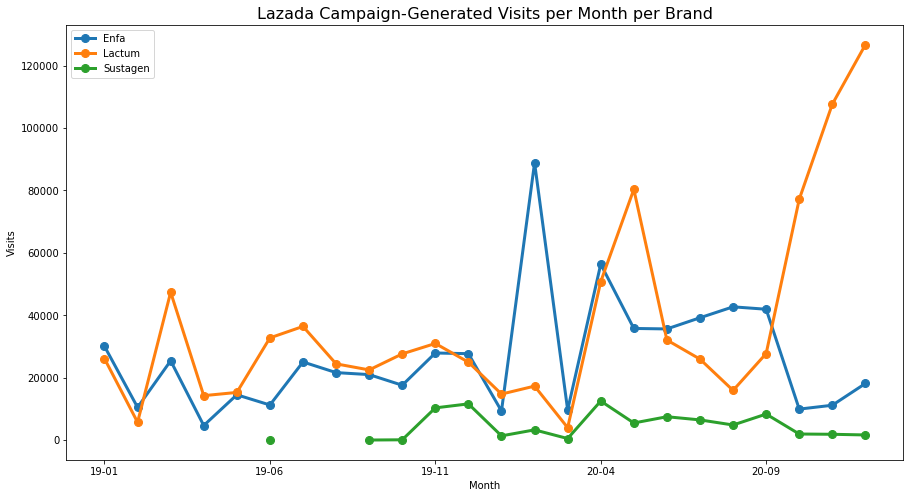

In [174]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_lz, values='visits', 
                   index=df_lz['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Visits')
ax.set_xlabel('Month')
ax.set_title('Lazada Campaign-Generated Visits per Month per Brand', fontsize=16);

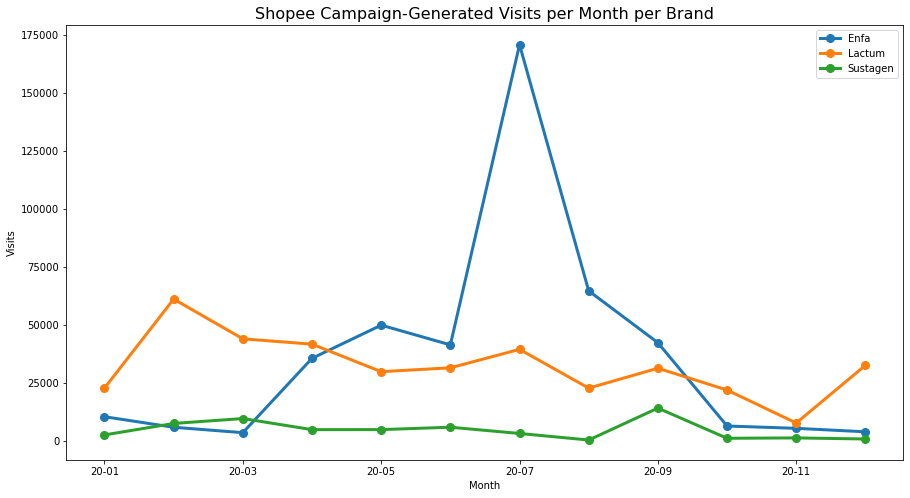

In [175]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_sp, values='visits', 
                   index=df_sp['date'].dt.strftime("%y-%m"), 
                   columns=['brand'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')
ax.legend()
# ax.get_xaxis().set_visible(False)
ax.set_ylabel('Visits')
ax.set_xlabel('Month')
ax.set_title('Shopee Campaign-Generated Visits per Month per Brand', fontsize=16);

## Facebook

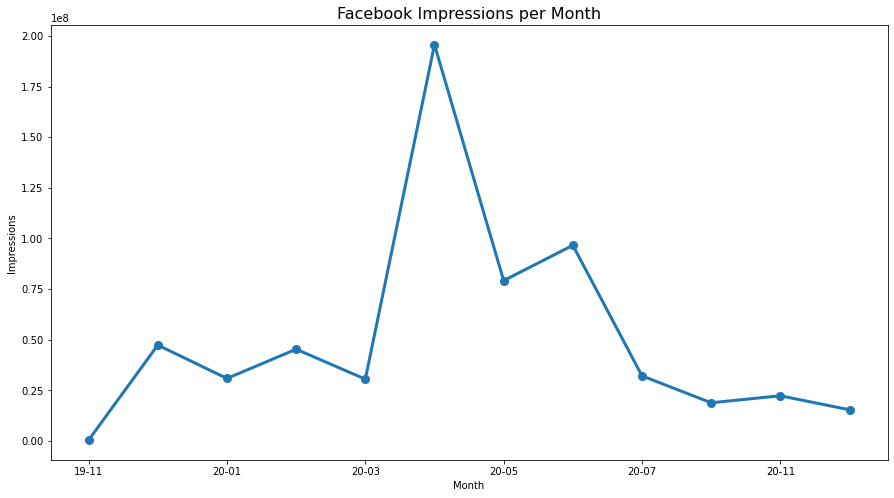

In [198]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['impressions'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Impressions')
ax.set_xlabel('Month')
ax.set_title('Facebook Impressions per Month', fontsize=16);

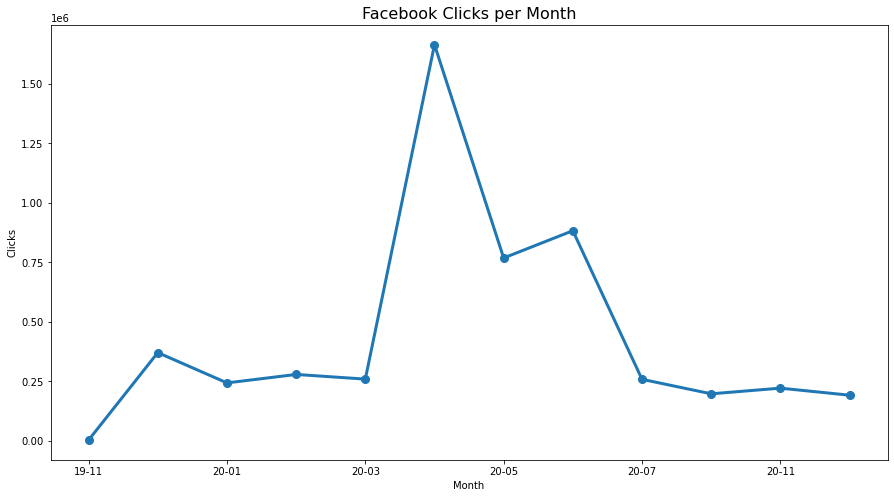

In [199]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['clicks'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Clicks')
ax.set_xlabel('Month')
ax.set_title('Facebook Clicks per Month', fontsize=16);

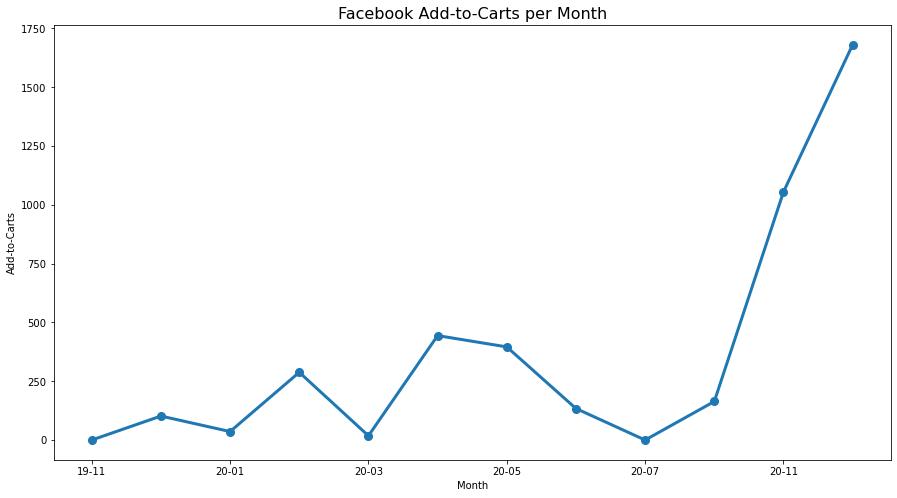

In [201]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['add_cart'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Add-to-Carts')
ax.set_xlabel('Month')
ax.set_title('Facebook Add-to-Carts per Month', fontsize=16);

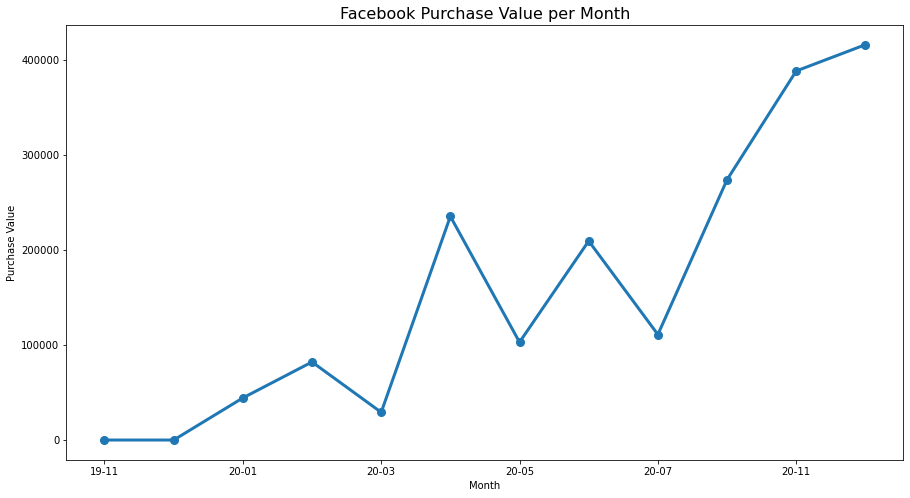

In [202]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['purchase_value'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Purchase Value')
ax.set_xlabel('Month')
ax.set_title('Facebook Purchase Value per Month', fontsize=16);

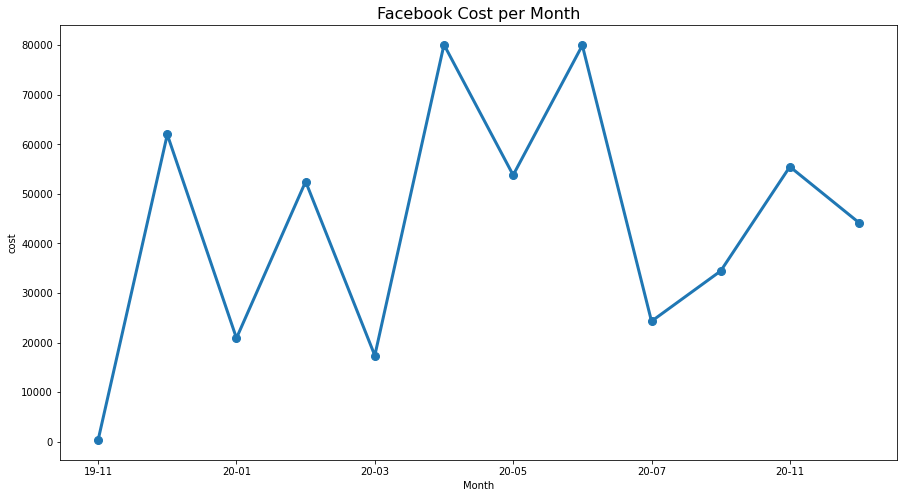

In [200]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('cost')
ax.set_xlabel('Month')
ax.set_title('Facebook Cost per Month', fontsize=16);

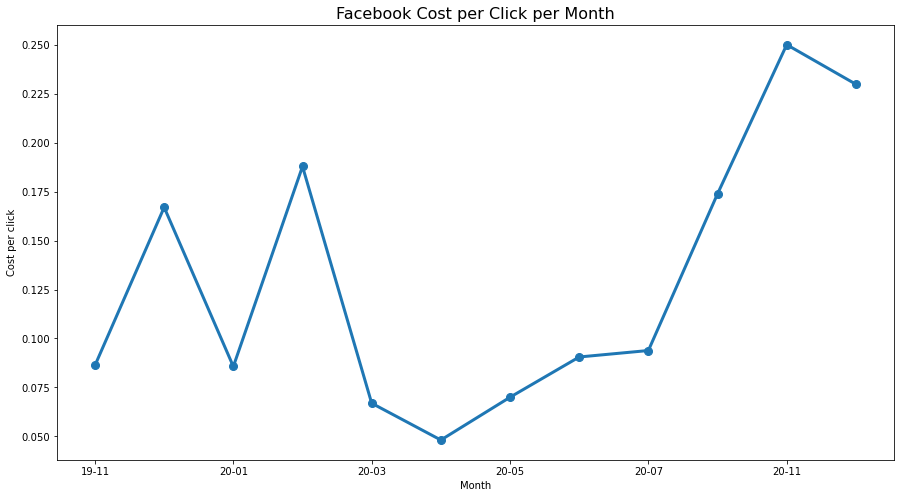

In [196]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d1 = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()
d2 = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['clicks'].sum()

d = d1 / d2

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Cost per click')
ax.set_xlabel('Month')
ax.set_title('Facebook Cost per Click per Month', fontsize=16);

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)



d = df_fb.groupby(df_fb['date'].dt.strftime("%y-%m"))['cost'].sum()

d.plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax)

ax.set_ylabel('Cost')
ax.set_xlabel('Month')
ax.set_title('Facebook Cost per Month', fontsize=16)

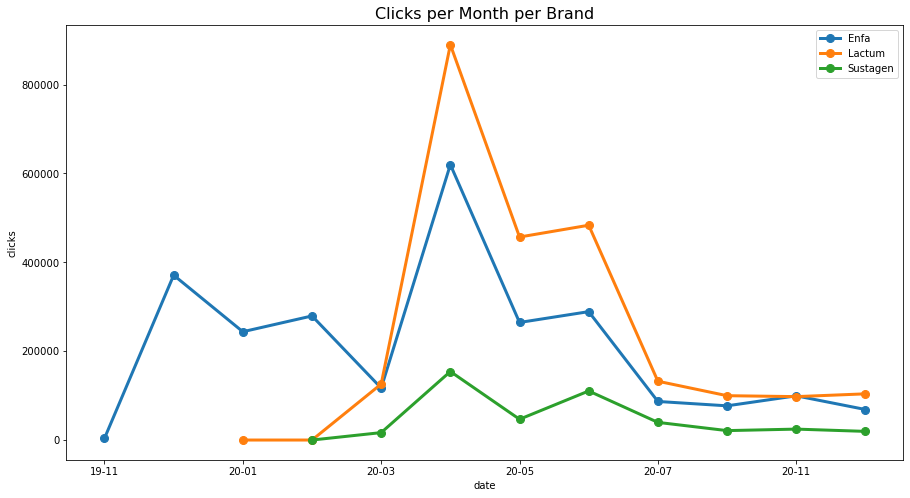

In [185]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_fb, values='clicks', 
                   index=df_fb['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
ax.set_ylabel('clicks')
ax.set_xlabel('date')
ax.set_title('Clicks per Month per Brand', fontsize=16);

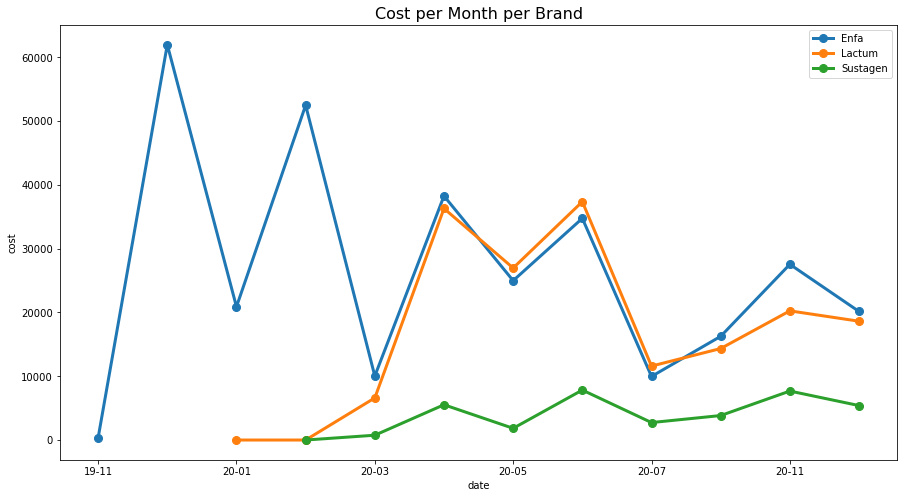

In [186]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

d = pd.pivot_table(df_fb, values='cost', 
                   index=df_fb['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
ax.set_ylabel('cost')
ax.set_xlabel('date')
ax.set_title('Cost per Month per Brand', fontsize=16);

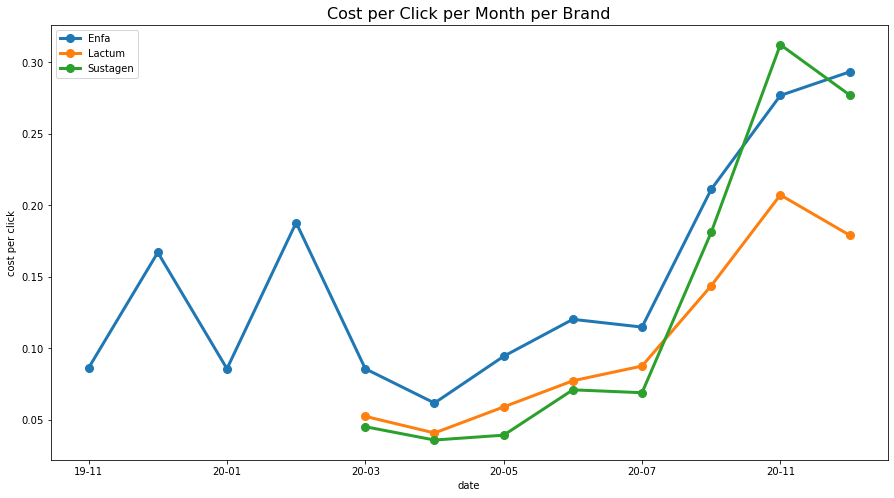

In [188]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

d1 = pd.pivot_table(df_fb, values='cost', 
                   index=df_fb['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum)
d2 = pd.pivot_table(df_fb, values='clicks', 
                   index=df_fb['date'].dt.strftime("%y-%m"), 
                   columns=['brand_name'], aggfunc=np.sum) 

d = d1 / d2

d['Enfa'].plot(kind="line", color='tab:blue', marker='o', linewidth=3, markersize=8, ax=ax, label='Enfa')
d['Lactum'].plot(kind="line", color='tab:orange', marker='o', linewidth=3, markersize=8, ax=ax, label='Lactum')
d['Sustagen'].plot(kind="line", color='tab:green', marker='o', linewidth=3, markersize=8, ax=ax, label='Sustagen')

ax.legend()
ax.set_ylabel('cost per click')
ax.set_xlabel('date')
ax.set_title('Cost per Click per Month per Brand', fontsize=16);
